In [47]:

from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42) 

In [48]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [49]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [50]:
circles.label.value_counts()

,count
label,
1,500
0,500


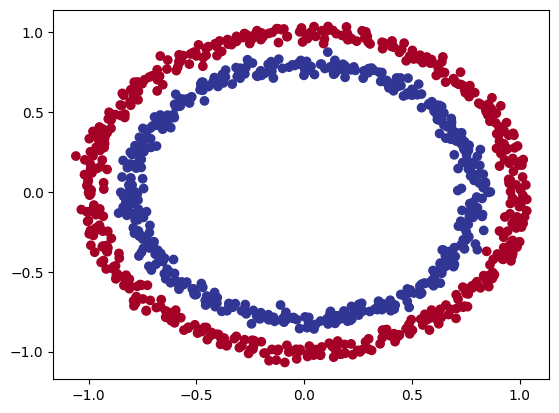

In [51]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [52]:
X.ndim, y.ndim, X.dtype, y.dtype, X.shape, y.shape

(2, 1, dtype('float64'), dtype('int64'), (1000, 2), (1000,))

In [53]:
type(X)

numpy.ndarray

In [54]:
import torch
from torch import nn
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.dataset import Dataset

In [55]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [58]:
X.device

device(type='cpu')

In [59]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [60]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('0.bias', tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('1.bias', tensor([-0.2060]))])

In [61]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
    print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
    print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
    print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
    print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]])

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [62]:
loss_fn = nn.BCEWithLogitsLoss()
criteria = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [63]:
def accuracy(y_true, y_pred):
    return torch.eq(y_true, y_pred).sum().item() / len(y_true)

In [64]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944],
        [-0.1256],
        [-0.1183],
        [-0.0871],
        [-0.1990],
        [-0.1960],
        [-0.1177],
        [-0.0954],
        [-0.1381],
        [-0.1427],
        [-0.1568],
        [-0.0955],
        [-0.1151],
        [-0.1519],
        [-0.1497],
        [-0.0818],
        [-0.0904],
        [-0.2042],
        [-0.1365],
        [-0.1991],
        [-0.1948],
        [-0.0960],
        [-0.0808],
        [-0.1195],
        [-0.1835],
        [-0.1235],
        [-0.1012],
        [-0.1149],
        [-0.1977],
        [-0.1909],
        [-0.1980],
        [-0.1553],
        [-0.1857],
        [-0.0966],
        [-0.1733],
        [-0.1167],
        [-0.0981],
        [-0.1613],
        [-0.0945],
        [-0.1067],
        [-0.1559],
        [-0.1113],
        [-0.1144],
        [-0.

In [65]:
probs = torch.sigmoid(y_logits)
probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584],
        [0.4630],
        [0.4794],
        [0.4764],
        [0.4522],
        [0.4764],
        [0.4687],
        [0.4705],
        [0.4782],
        [0.4504],
        [0.4511],
        [0.4706],
        [0.4762],
        [0.4655],
        [0.4644],
        [0.4609],
        [0.4761],
        [0.4713],
        [0.4621],
        [0.4627],
        [0.4796],
        [0.4774],
        [0.4491],
        [0.4659],
        [0.4504],
        [0.4514],
        [0.4760],
        [0.4798],
        [0.4702],
        [0.4543],
        [0.4692],
        [0.4747],
        [0.4713],
        [0.4507],
        [0.4524],
        [0.4507],
        [0.4613],
        [0.4537],
        [0.4759],
        [0.4568],
        [0.4709],
        [0.4755],
        [0.4598],
        [0.4764],
        [0.4733],
        [0.4611],
        [0.4722],
        [0.4714],
        [0.4680],
        [0.4548],
        [0.4747],
        [0

In [66]:
y_preds = probs.round()

In [67]:
y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [68]:
# Train loop

epochs = 100

for epoch in range(epochs):
    model_0.train()
    logits = model_0(X_train)
    loss = loss_fn(torch.squeeze(logits), y_train)
    print("**Train**")
    print(loss)
    criteria.zero_grad()
    loss.backward()

    criteria.step()

    model_0.eval()
    with torch.inference_mode():
        logits = model_0(X_test)

        loss = loss_fn(torch.squeeze(logits), y_test)
        print("**Test**")
        print(loss)
        print(accuracy(y_test, logits.round().reshape(200)))
        print(y_test)
        print(logits.round())

**Train**
tensor(0.6957, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
**Test**
tensor(0.6974)
0.5
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])
t

In [69]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get(
        "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    )
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


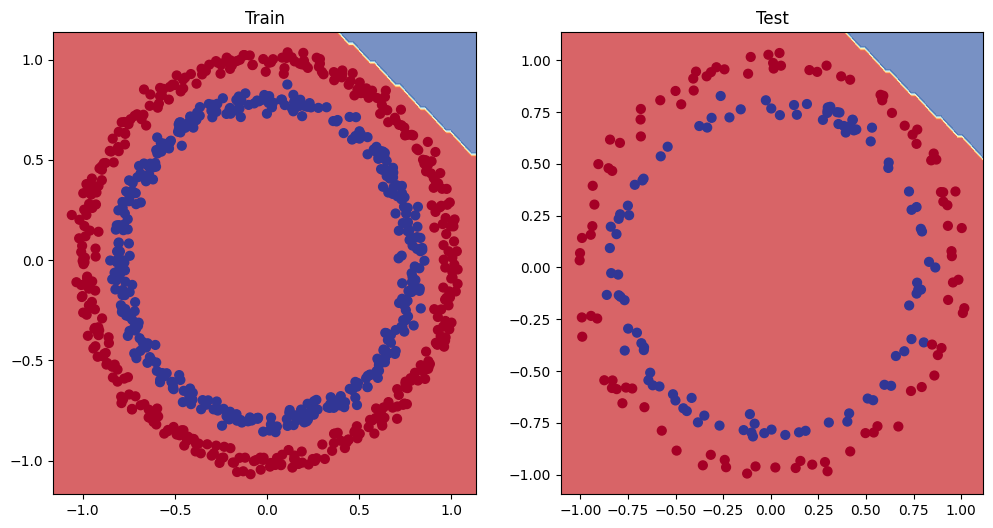

In [70]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [71]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=5)
        self.layer3 = nn.Linear(in_features=5, out_features=1)
    def forward(self, x):
        z = self.layer1(x)
        z = self.layer2(z)
        z = self.layer3(z)
        return z
    
model_1 = CircleModelV2()

In [72]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [73]:
torch.manual_seed(42)
epochs = 60
train_loss = []
test_loss = []
train_acc = []
test_acc = []
epoch_list = []

for epoch in range(epochs):
    epoch_list.append(epoch)
    model_1.train()

    logits = model_1(X_train)

    loss = loss_fn(y_train, logits.squeeze())
    train_loss.append(loss.detach().numpy())
    train_acc.append(accuracy(y_true=y_train, y_pred=logits.reshape(-1).round()))
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        logits = model_1(X_test)

        loss = loss_fn(y_test, logits.squeeze())
        test_loss.append(loss.detach().numpy())
        test_acc.append(accuracy(y_true=y_test, y_pred=logits.reshape(-1)))
        optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f"*******{epoch}*******")
        print(f"Train loss: {train_loss[-1]} | Train accuracy: {train_acc[-1]}")
        print(f"Test loss: {test_loss[-1]} | Test accuracy: {test_acc[-1]}")

*******0*******
Train loss: 0.949917197227478 | Train accuracy: 0.5
Test loss: 0.8925489783287048 | Test accuracy: 0.0
*******10*******
Train loss: 0.24970903992652893 | Train accuracy: 0.24125
Test loss: 0.13673023879528046 | Test accuracy: 0.0
*******20*******
Train loss: -2.714597702026367 | Train accuracy: 0.0
Test loss: -3.645298719406128 | Test accuracy: 0.0
*******30*******
Train loss: -219.369140625 | Train accuracy: 0.0
Test loss: -567.17919921875 | Test accuracy: 0.0
*******40*******
Train loss: nan | Train accuracy: 0.0
Test loss: nan | Test accuracy: 0.0
*******50*******
Train loss: nan | Train accuracy: 0.0
Test loss: nan | Test accuracy: 0.0


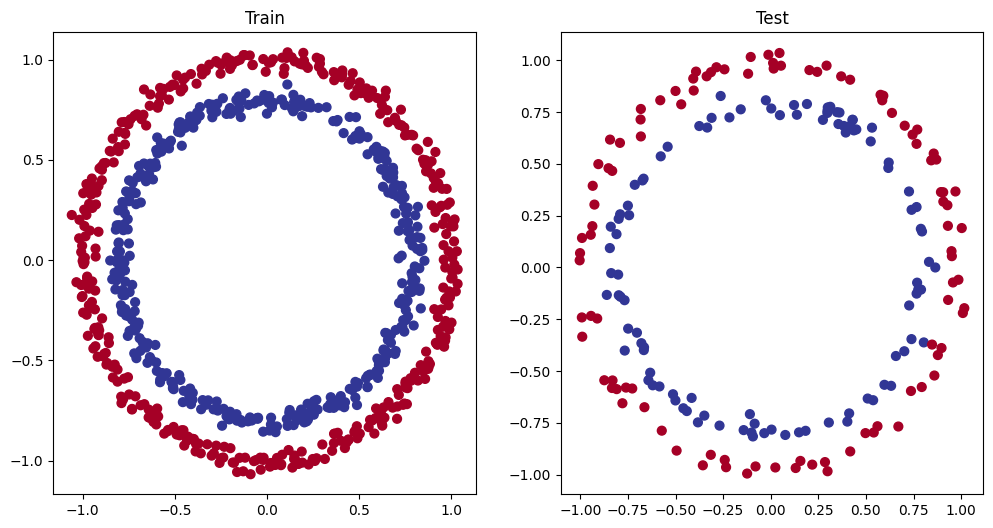

In [74]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

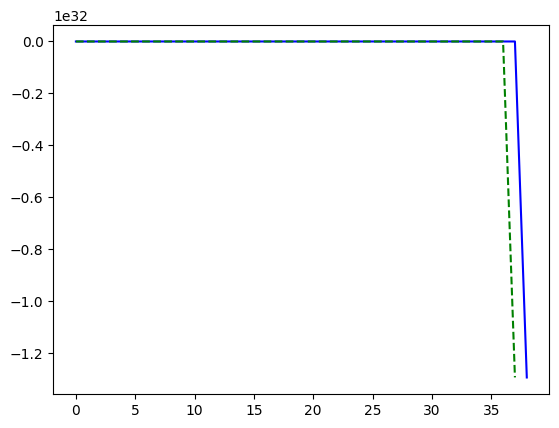

In [75]:
plt.plot(epoch_list, train_loss, "b-", label="Train Loss")
plt.plot(epoch_list, test_loss, "g--", label="Test Loss")
plt.show()

In [76]:
from torch import nn


class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()  

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [77]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [84]:
torch.manual_seed(42)
epochs = 10000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(
        torch.sigmoid(y_logits)
    )  
    loss = loss_fn(
        y_logits,
        y_train
    )
    acc = accuracy(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(
            torch.sigmoid(test_logits)
        ) 
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
        print(
            f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%"
        )

Epoch: 0 | Loss: 0.56818, Accuracy: 0.88% | Test Loss: 0.57378, Test Accuracy: 0.86%
Epoch: 100 | Loss: 0.48153, Accuracy: 0.94% | Test Loss: 0.49935, Test Accuracy: 0.91%
Epoch: 200 | Loss: 0.37056, Accuracy: 0.98% | Test Loss: 0.40595, Test Accuracy: 0.92%
Epoch: 300 | Loss: 0.25458, Accuracy: 0.99% | Test Loss: 0.30333, Test Accuracy: 0.96%
Epoch: 400 | Loss: 0.17180, Accuracy: 0.99% | Test Loss: 0.22108, Test Accuracy: 0.97%
Epoch: 500 | Loss: 0.12188, Accuracy: 1.00% | Test Loss: 0.16512, Test Accuracy: 0.99%
Epoch: 600 | Loss: 0.09123, Accuracy: 1.00% | Test Loss: 0.12741, Test Accuracy: 0.99%
Epoch: 700 | Loss: 0.07100, Accuracy: 1.00% | Test Loss: 0.10319, Test Accuracy: 0.99%
Epoch: 800 | Loss: 0.05773, Accuracy: 1.00% | Test Loss: 0.08672, Test Accuracy: 0.99%
Epoch: 900 | Loss: 0.04853, Accuracy: 1.00% | Test Loss: 0.07474, Test Accuracy: 0.99%
Epoch: 1000 | Loss: 0.04176, Accuracy: 1.00% | Test Loss: 0.06583, Test Accuracy: 1.00%
Epoch: 1100 | Loss: 0.03628, Accuracy: 1.00%

In [85]:

model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] 

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

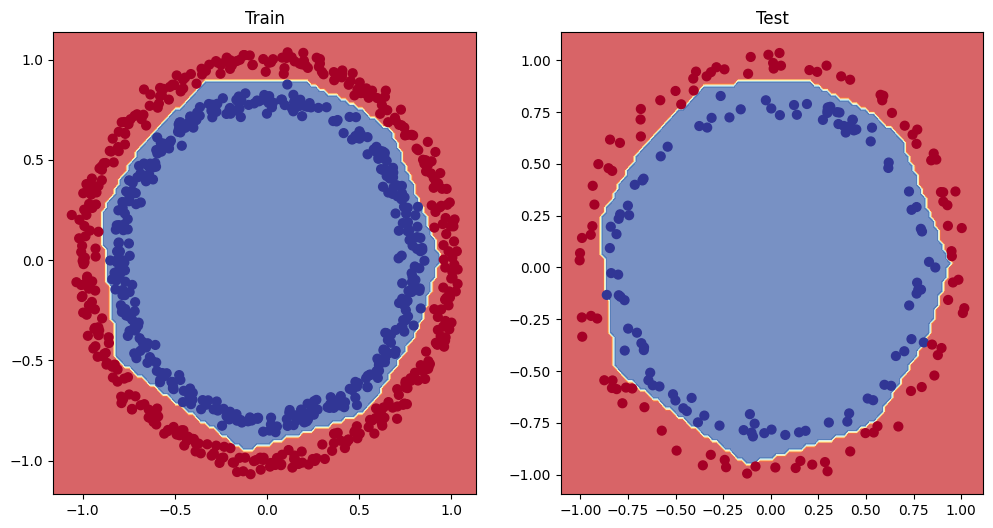

In [87]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)  
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) 

In [88]:
from sklearn.datasets import make_blobs

In [89]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

In [94]:
X_blob, y_blob = make_blobs(
    n_samples=1000,
    n_features=NUM_FEATURES, 
    centers=NUM_CLASSES, 
    cluster_std=1.5,  
    random_state=RANDOM_SEED,
)

In [ ]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(
    X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED
)

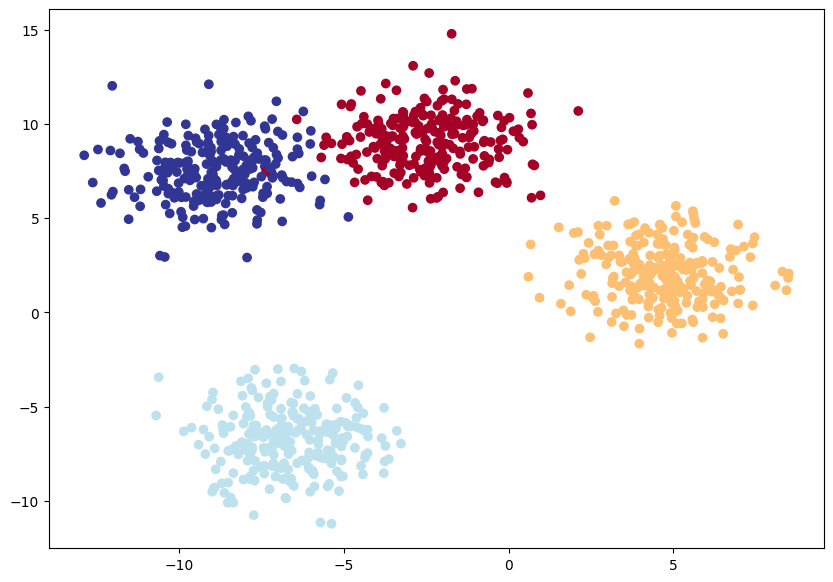

In [96]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)